# Density Matrix Exponentiation using Heisenberg interaction from ZZ gates and single qubit gates

## 1. SWAP interaction from Heisenberg interaction
In this section we demonstrate how we generate Heisenberg interaction from ZZ gate, and how to get SWAP interaction from this.

### 1.1. Getting XX and YY from ZZ interaction

In [30]:
import numpy as np
# Pauli matrices
X = np.array([[0, 1],
            [1, 0]])
Y = np.array([[0, -1j],
            [1j, 0]])
Z = np.array([[1, 0],
            [0, -1]])
# Hadamard gate
H = np.array([[1,  1],
              [1, -1]]) / np.sqrt(2)
# S gate
S = np.array([[1, 0],
              [0, 1j]])
# S-dagger gate
S_dagger = np.array([[1,  0],
                     [0, -1j]])

In [31]:
ZZ = np.kron(Z,Z)
print(ZZ)

[[ 1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0 -1  0]
 [ 0  0  0  1]]


#### XX gate
By applying two Hadamard gates onto each qubit, we can get the XX gate:
\begin{align}
    (H \otimes H) e^{-itZ\otimes Z} (H \otimes H) = e^{-it(H \otimes H)(Z\otimes Z)(H \otimes H)} = e^{-itX\otimes X}
\end{align}

In [32]:
XX = np.kron(X,X)
XX_from_ZZ = np.kron(H,H) @ ZZ @ np.kron(H,H)
print(f'XX:\n{XX}')
print(f'XX using ZZ and H (to 5 sf):\n{np.round(XX_from_ZZ,5)}')

XX:
[[0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]]
XX using ZZ and H (to 5 sf):
[[ 0. -0. -0.  1.]
 [-0.  0.  1. -0.]
 [-0.  1.  0. -0.]
 [ 1. -0. -0.  0.]]


#### YY gate
Similarly, we can achieve the YY gate by applying $S^\dagger$ gate followed by Hadamard gate:
\begin{align}
    (SH \otimes SH) e^{-itZ\otimes Z}  [(H S^\dagger) \otimes (H S^\dagger)] = e^{-it(SH \otimes SH)(Z\otimes Z)[(H S^\dagger) \otimes (H S^\dagger)]} = e^{-itY\otimes Y}
\end{align}

In [33]:
YY = np.kron(Y,Y)
YY_from_ZZ = np.kron(S@H,S@H) @ ZZ @ np.kron(H@S_dagger,H@S_dagger)
print(f'YY:\n{YY}')
print(f'YY using ZZ, H and S (to 5 sf):\n{np.round(YY_from_ZZ,5)}')

YY:
[[ 0.+0.j  0.-0.j  0.-0.j -1.+0.j]
 [ 0.+0.j  0.+0.j  1.-0.j  0.-0.j]
 [ 0.+0.j  1.-0.j  0.+0.j  0.-0.j]
 [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]]
YY using ZZ, H and S (to 5 sf):
[[ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]
 [ 0.-0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.-0.j  1.+0.j  0.+0.j  0.+0.j]
 [-1.+0.j  0.-0.j  0.-0.j  0.+0.j]]


### 1.2. Parameterized Heisenberg gate (XXZ) from ZZ and single qubit
Because ZZ, YY and XX commute, we can achieve the SWAP operation by doing:
\begin{align}
    e^{-itSWAP} &=e^{-it(Z\otimes Z + Y\otimes Y + X\otimes X)}\\
    &= e^{-itZ\otimes Z}e^{-itY\otimes Y}e^{-itX\otimes X}\\
    &= e^{-itZ\otimes Z} (SH \otimes SH) e^{-itZ\otimes Z}
    [(H S^\dagger) \otimes (H S^\dagger)]
    (H \otimes H) e^{-itZ\otimes Z} (H \otimes H) \\
    &= e^{-itZ\otimes Z} (SH \otimes SH) e^{-itZ\otimes Z}
    [(HS^\dagger H) \otimes (HS^\dagger H)] e^{-itZ\otimes Z} (H \otimes H)
\end{align}

In [34]:
Heisenberg = XX+YY+ZZ
print(f'Heisenberg:\n{Heisenberg}')
SWAP = np.array([[1, 0, 0, 0],
                [0, 0, 1, 0],
                [0, 1, 0, 0],
                [0, 0, 0, 1]])
print(f'SWAP:\n{SWAP}')

Heisenberg:
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  2.+0.j  0.+0.j]
 [ 0.+0.j  2.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]]
SWAP:
[[1 0 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]]


Consider 2 qubits $\rho_W$ in state $\ket{0}\bra{0}$ and $\rho_M$ in state $\ket{+}\bra{+}$. We apply a unitary evolution guided by Heisenberg gate on these two qubits, then trace out state $\rho_M$. (The states here are in density matrix form)

We expect a SWAP operation to happen: the fidelity $F(\rho_W,\ket{0})$ follow a sinusodial pattern.

In [35]:
state_0 = np.outer(np.array([1,0]),np.array([1,0]))
state_1 = np.outer(np.array([1,1]),np.array([1,1]))/2
state_01 = np.kron(state_0,state_1)
print(f'|01><01| = \n{state_01}')

|01><01| = 
[[0.5 0.5 0.  0. ]
 [0.5 0.5 0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]


In [36]:
def ptrace(matrix,n1=2,n2=2):
    # Partial trace function for density matrices
    current_tensor=matrix.reshape([n1, n2, n1, n2])
    return np.trace(current_tensor, axis1=1, axis2=3)

from scipy.linalg import sqrtm
def fidelity(rho1, rho2):
    # Compute the square root of the first density matrix
    sqrt_rho1 = sqrtm(rho1)
    # Compute the matrix product of sqrt(rho1) * rho2 * sqrt(rho1)
    product = sqrt_rho1 @ rho2 @ sqrt_rho1    
    # Compute the square root of the product matrix
    sqrt_product = sqrtm(product)    
    return np.real(np.trace(sqrt_product)) ** 2

In [37]:
import scipy
times = np.linspace(0,2*np.pi,100)
heisenberg_fidelities = []
for t in times:
    V = 1j* scipy.linalg.expm( -1j * t/2 * Heisenberg)
    V_ = np.array(np.matrix(V).getH())
    rho_W = ptrace(V @ state_01 @ V_)
    heisenberg_fidelities.append(fidelity(rho_W,state_0))

swap_fidelities = []
for t in times:
    U = 1j* scipy.linalg.expm( -1j * t * SWAP)
    U_ = np.array(np.matrix(U).getH())
    rho_W = ptrace(U @ state_01 @ U_)
    swap_fidelities.append(fidelity(rho_W,state_0))

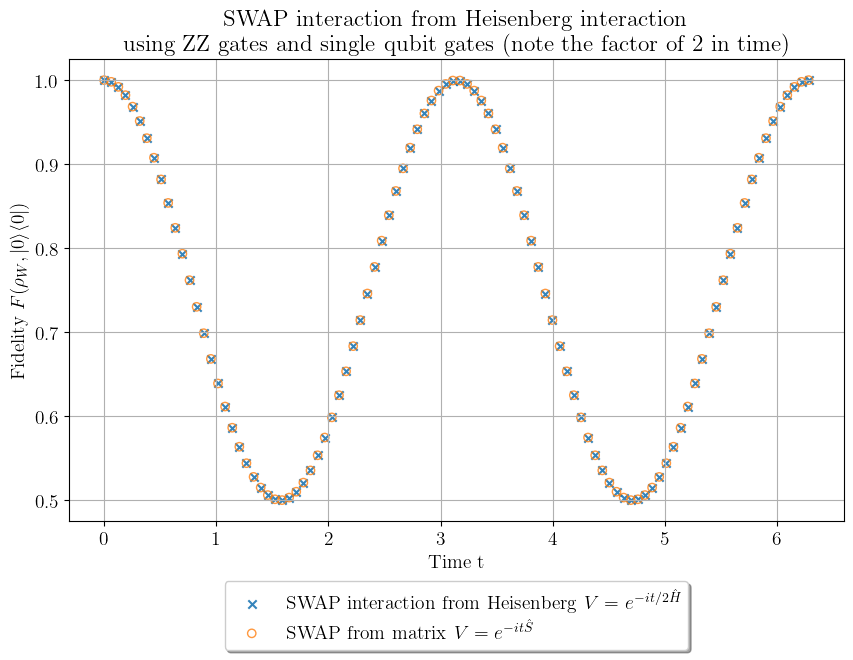

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({
    "figure.figsize": (10, 6),
    "text.usetex": True, # Remove this line if your code doesn't run/ take too long
    "font.family": "serif",
    "figure.dpi": 100,
    "font.size": 14
})

plt.scatter(times,heisenberg_fidelities,label=r'SWAP interaction from Heisenberg $V = e^{-it/2\hat{H}}$',alpha=0.9, marker='x')
plt.scatter(times,swap_fidelities,label=r'SWAP from matrix $V = e^{-it\hat{S}}$',alpha=0.8, marker='o', facecolors='none',edgecolors='C1')
plt.xlabel('Time t')
plt.ylabel(r'Fidelity $F(\rho_W,|0\rangle\langle 0|)$')
plt.title('SWAP interaction from Heisenberg interaction\nusing ZZ gates and single qubit gates (note the factor of 2 in time)')
plt.legend(loc='lower center',bbox_to_anchor=(0.5, -0.3),shadow=True, ncol=1)
plt.grid()

## 2. DME on single qubit using our Heisenberg interaction

In [39]:
Heisenberg

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j,  2.+0.j,  0.+0.j],
       [ 0.+0.j,  2.+0.j, -1.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j]])

In [40]:
fidelities = []
Ns = np.arange(2,50,1)
t=np.pi/2

V = 1j* scipy.linalg.expm( -1j * t * state_1)
V_ = np.array(np.matrix(V).getH())
expected_rho_W = V @ state_0 @ V_

for N in Ns:
    rho_W = state_0
    new_rho = state_01
    for k in np.arange(1,N,1):
        V = 1j* scipy.linalg.expm( -1j * t/(2*N) * Heisenberg)
        V_ = np.array(np.matrix(V).getH())
        rho_W = ptrace(V @ new_rho @ V_)
        new_rho = np.kron(rho_W,state_1)
    fidelities.append(fidelity(rho_W,expected_rho_W))
    # norms_dme.append(fidelity(rho_I,ket_plus_density_matrix))


In [41]:
fidelities_fid = []
p_zz = 0.75
p = 1-p_zz

identity =    np.array([[1, 0, 0, 0],
                [0, 1, 0, 0],
                [0, 0, 1, 0],
                [0, 0, 0, 1]])

for N in Ns:
    rho_W = state_0
    new_rho = state_01
    for k in np.arange(1,N,1):
        V = 1j* scipy.linalg.expm( -1j * t/(2*N) *((1-p)*Heisenberg + p*identity))
        V_ = np.array(np.matrix(V).getH())
        rho_W = ptrace(V @ new_rho @ V_)
        new_rho = np.kron(rho_W,state_1)
    fidelities_fid.append(fidelity(rho_W,expected_rho_W))
    # norms_dme.append(fidelity(rho_I,ket_plus_density_matrix))


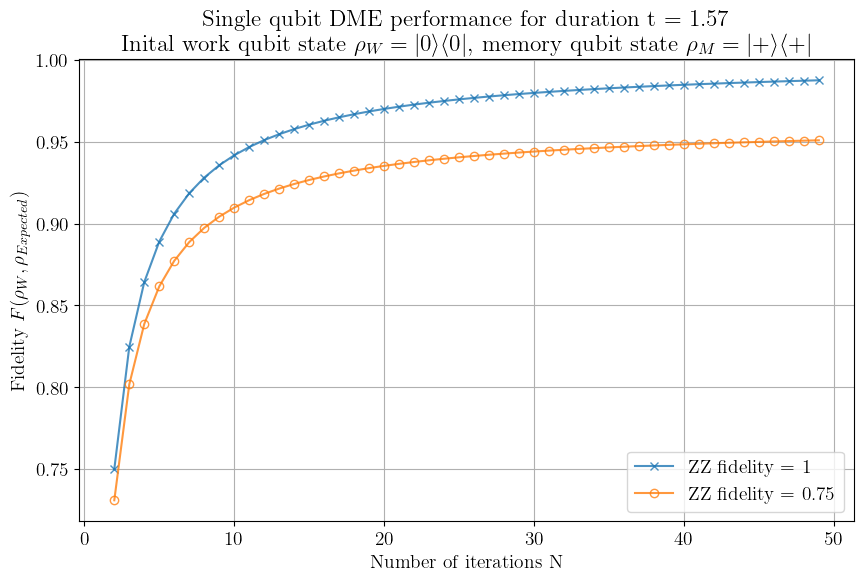

In [42]:
#plt.axhline(expected_fidelity,c='k',label=r'Expected from $e^{-it\rho_M}$', linestyle=':')
plt.plot(Ns,fidelities,label='ZZ fidelity = 1',marker='x',alpha=0.8)
plt.plot(Ns,fidelities_fid,label=f'ZZ fidelity = {p_zz}',marker='o',markerfacecolor='none',alpha=0.8)

plt.ylabel(r'Fidelity $F(\rho_W,\rho_{{Expected}})$')
plt.grid()
plt.xlabel('Number of iterations N')
plt.title(f'Single qubit DME performance for duration t = {np.round(t,2)}\nInital work qubit state '+
           r'$\rho_{W} = |0\rangle\langle 0|$, memory qubit state $\rho_M = |+\rangle\langle +|$')
plt.legend()
#plt.legend(bbox_to_anchor=(1.1, -0.12),shadow=True)